In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
dataset = pd.read_csv( 'C:/Users/Venkateshwaran/OneDrive/Desktop/pumf_cchs.csv' )

In [78]:
dataset.dtypes

ADM_RNO1      int64
VERDATE       int64
REFPER       object
GEOGPRV       int64
GEODGHR4      int64
             ...   
INCDGRRS      int64
ADM_040       int64
ADM_045       int64
ADM_050       int64
WTS_M       float64
Length: 691, dtype: object

In [80]:
dataset.columns

Index(['ADM_RNO1', 'VERDATE', 'REFPER', 'GEOGPRV', 'GEODGHR4', 'DHH_SEX',
       'DHHGMS', 'DHHDGHSZ', 'ADM_PRX', 'DHHGAGE',
       ...
       'FSCDVHF2', 'INCG015', 'INCDGHH', 'INCDGRCA', 'INCDGRPR', 'INCDGRRS',
       'ADM_040', 'ADM_045', 'ADM_050', 'WTS_M'],
      dtype='object', length=691)

In [83]:
dataset.head(5)

,ADM_RNO1,VERDATE,REFPER,GEOGPRV,GEODGHR4,DHH_SEX,DHHGMS,DHHDGHSZ,ADM_PRX,DHHGAGE,...,FSCDVHF2,INCG015,INCDGHH,INCDGRCA,INCDGRPR,INCDGRRS,ADM_040,ADM_045,ADM_050,WTS_M
0,1000,20240531,2019-2020,47,47906,2,1,2,2,3,...,0,1,5,4,4,4,1,1,6,762.82
1,100005,20240531,2019-2020,47,47906,1,1,2,2,5,...,0,2,4,2,2,2,6,1,6,31.78
2,100012,20240531,2019-2020,59,59914,2,2,1,2,5,...,6,2,2,1,1,1,2,1,6,59.24
3,100015,20240531,2019-2020,13,13904,1,2,1,2,5,...,0,2,3,3,3,9,6,1,6,22.83
4,100018,20240531,2019-2020,46,46903,1,2,1,2,4,...,0,2,1,1,1,9,2,1,6,39.96


In [85]:
import warnings
warnings.filterwarnings('ignore') 
convdata=dataset[["ADM_RNO1","CAN_015","DHH_SEX","DHHGAGE","EHG2DVH3","GEN_005","GENDVHDI","GEOGPRV","HWTDGISW","PAADVACV","PEX_005","SMK_005","SMK_060"]]
convdata["GENDVHDI"]=convdata["GENDVHDI"]+1
convdata

,ADM_RNO1,CAN_015,DHH_SEX,DHHGAGE,EHG2DVH3,GEN_005,GENDVHDI,GEOGPRV,HWTDGISW,PAADVACV,PEX_005,SMK_005,SMK_060
0,1000,2,2,3,3,3,3,47,1,2,96,3,6
1,100005,2,1,5,2,3,3,47,2,3,96,3,6
2,100012,2,2,5,1,2,4,59,2,6,96,3,6
3,100015,2,1,5,1,3,3,13,2,6,96,3,6
4,100018,2,1,4,3,5,1,46,2,6,96,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108247,999964,2,2,5,1,2,4,11,2,3,96,1,6
108248,999967,1,2,2,3,3,3,35,1,6,96,3,6
108249,999976,1,1,2,3,1,5,13,1,6,96,3,6
108250,999980,2,1,5,2,3,3,59,2,6,96,3,6


In [87]:
cannabis_usage={1:"Yes",2:"No",7:"Don't know",8:"Refusal",9:"Not stated"}
agegroup={1:"12 to 17 years",2:"18 to 34 years",3:"35 to 49 years",4:"50 to 64 years",5:"65 and older"}
sextype={1:"Male",2:"Female"}
educationdtl={1:"Less than secondary school graduation",2:"Secondary school graduation, no post-secondary education",3:"Post-secondary certificate/diploma /university degree",9:"Not stated"}
perceivedhealth={1:"Excellent",2:"Very good",3:"Good",4:"Fair",5:"Poor",7:"Don’t know",8:"Refusal"}
perceivedhealthd={1:"Poor",2:"Fair",3:"Good",4:"Very good",5:"Excellent",10:"Don’t know"}
geo={10:"NEWFOUNDLAND AND LABRADOR",11:"PRINCE EDWARD ISLAND",12:"NOVA SCOTIA",13:"NEW BRUNSWICK",24:"QUEBEC",35:"ONTARIO",46:"MANITOBA",47:"SASKATCHEWAN",48:"ALBERTA",59:"BRITISH COLUMBIA",60:"YUKON/NORTHWEST/NUNAVUT"}
bmi={1:"Underweight/ Normal weight",2:"Overweight / Obese - Class I, II, III",6:"Valid skip",9:"Not stated"}
physicallyactive={1:"Physically active at / above recommended level from CPAG",2:"Physically active below recommended level from CPAG",3:"No physical activity minutes reported",6:"Valid skip",9:"Not stated"}
consultwithhealthprof={1:"In the last 30 days",2:"Between 1 and 3 months ago",3:"More than 3 but less than 6 months ago",4:"Between 6 and 12 months ago",5:"Between 1 and 2 years ago",6:"More than 2 years ago",
                     96:"Valid skip",97:"Don’t know",98:"Refusal",99:"Not stated" }
smkfrequency={1:"Daily",2:"Occasionally",3:"Not at all",7:"Don’t know",8:"Refusal",9:"Not stated"}
stoppedsmk={1:"Less than one year ago",2:"1 year to less than 2 years ago",3:"2 years to less than 3 years ago",4:"3 or more years ago",6:"Valid skip",7:"Don’t know",8:"Refusal",9:"Not stated"}


In [95]:
#convdata = convdata.replace({"CAN_015": cannabis_usage})
import warnings
warnings.filterwarnings('ignore') 
convdata["cannabis_usage"] = convdata[["CAN_015"]].copy().replace({"CAN_015": cannabis_usage})
convdata["sextype"] = convdata[["DHH_SEX"]].copy().replace({"DHH_SEX": sextype})
convdata["agegroup"] = convdata[["DHHGAGE"]].copy().replace({"DHHGAGE": agegroup})
convdata["perceivedhealth"] = convdata[["GEN_005"]].copy().replace({"GEN_005": perceivedhealth})
convdata["perceivedhealthd"] = convdata[["GENDVHDI"]].copy().replace({"GENDVHDI": perceivedhealthd})
convdata["geo"] = convdata[["GEOGPRV"]].copy().replace({"GEOGPRV": geo})
convdata["bmi"] = convdata[["HWTDGISW"]].copy().replace({"HWTDGISW": bmi})
convdata["physicallyactive"] = convdata[["PAADVACV"]].copy().replace({"PAADVACV": physicallyactive})
convdata["smkfrequency"] = convdata[["SMK_005"]].copy().replace({"SMK_005": smkfrequency})
convdata["educationdtl"]= convdata[["EHG2DVH3"]].copy().replace({"EHG2DVH3": educationdtl})
convdata

,ADM_RNO1,CAN_015,DHH_SEX,DHHGAGE,EHG2DVH3,GEN_005,GENDVHDI,GEOGPRV,HWTDGISW,PAADVACV,...,cannabis_usage,sextype,agegroup,perceivedhealth,perceivedhealthd,geo,bmi,physicallyactive,smkfrequency,educationdtl
0,1000,2,2,3,3,3,3,47,1,2,...,No,Female,35 to 49 years,Good,Good,SASKATCHEWAN,Underweight/ Normal weight,Physically active below recommended level from...,Not at all,Post-secondary certificate/diploma /university...
1,100005,2,1,5,2,3,3,47,2,3,...,No,Male,65 and older,Good,Good,SASKATCHEWAN,"Overweight / Obese - Class I, II, III",No physical activity minutes reported,Not at all,"Secondary school graduation, no post-secondary..."
2,100012,2,2,5,1,2,4,59,2,6,...,No,Female,65 and older,Very good,Very good,BRITISH COLUMBIA,"Overweight / Obese - Class I, II, III",Valid skip,Not at all,Less than secondary school graduation
3,100015,2,1,5,1,3,3,13,2,6,...,No,Male,65 and older,Good,Good,NEW BRUNSWICK,"Overweight / Obese - Class I, II, III",Valid skip,Not at all,Less than secondary school graduation
4,100018,2,1,4,3,5,1,46,2,6,...,No,Male,50 to 64 years,Poor,Poor,MANITOBA,"Overweight / Obese - Class I, II, III",Valid skip,Not at all,Post-secondary certificate/diploma /university...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108247,999964,2,2,5,1,2,4,11,2,3,...,No,Female,65 and older,Very good,Very good,PRINCE EDWARD ISLAND,"Overweight / Obese - Class I, II, III",No physical activity minutes reported,Daily,Less than secondary school graduation
108248,999967,1,2,2,3,3,3,35,1,6,...,Yes,Female,18 to 34 years,Good,Good,ONTARIO,Underweight/ Normal weight,Valid skip,Not at all,Post-secondary certificate/diploma /university...
108249,999976,1,1,2,3,1,5,13,1,6,...,Yes,Male,18 to 34 years,Excellent,Excellent,NEW BRUNSWICK,Underweight/ Normal weight,Valid skip,Not at all,Post-secondary certificate/diploma /university...
108250,999980,2,1,5,2,3,3,59,2,6,...,No,Male,65 and older,Good,Good,BRITISH COLUMBIA,"Overweight / Obese - Class I, II, III",Valid skip,Not at all,"Secondary school graduation, no post-secondary..."


In [97]:
convdata
convdata.columns

Index(['ADM_RNO1', 'CAN_015', 'DHH_SEX', 'DHHGAGE', 'EHG2DVH3', 'GEN_005',
       'GENDVHDI', 'GEOGPRV', 'HWTDGISW', 'PAADVACV', 'PEX_005', 'SMK_005',
       'SMK_060', 'cannabis_usage', 'sextype', 'agegroup', 'perceivedhealth',
       'perceivedhealthd', 'geo', 'bmi', 'physicallyactive', 'smkfrequency',
       'educationdtl'],
      dtype='object')

In [99]:
convdata=convdata[['ADM_RNO1','agegroup','sextype','geo','perceivedhealthd','bmi','smkfrequency','GENDVHDI']]

In [101]:
values1=['Daily','Occasionally','Not at all']
values2=['Underweight/ Normal weight','Occasionally','Overweight / Obese - Class I, II, III']
values3=['Don’t know']
convdata= convdata[convdata['bmi'].isin(values2)]
convdata= convdata[convdata['smkfrequency'].isin(values1)]
convdata= convdata[~convdata['perceivedhealthd'].isin(values3)]
analysis1=convdata.groupby(['bmi','smkfrequency'])['GENDVHDI'].mean().reset_index()
analysis1['percentage'] = analysis1['GENDVHDI'] / analysis1.groupby('smkfrequency')['GENDVHDI'].transform('sum') * 100
analysis1

,bmi,smkfrequency,GENDVHDI,percentage
0,"Overweight / Obese - Class I, II, III",Daily,3.151904,49.020946
1,"Overweight / Obese - Class I, II, III",Not at all,3.492109,47.794112
2,"Overweight / Obese - Class I, II, III",Occasionally,3.560591,48.746553
3,Underweight/ Normal weight,Daily,3.277804,50.979054
4,Underweight/ Normal weight,Not at all,3.814459,52.205888
5,Underweight/ Normal weight,Occasionally,3.743702,51.253447


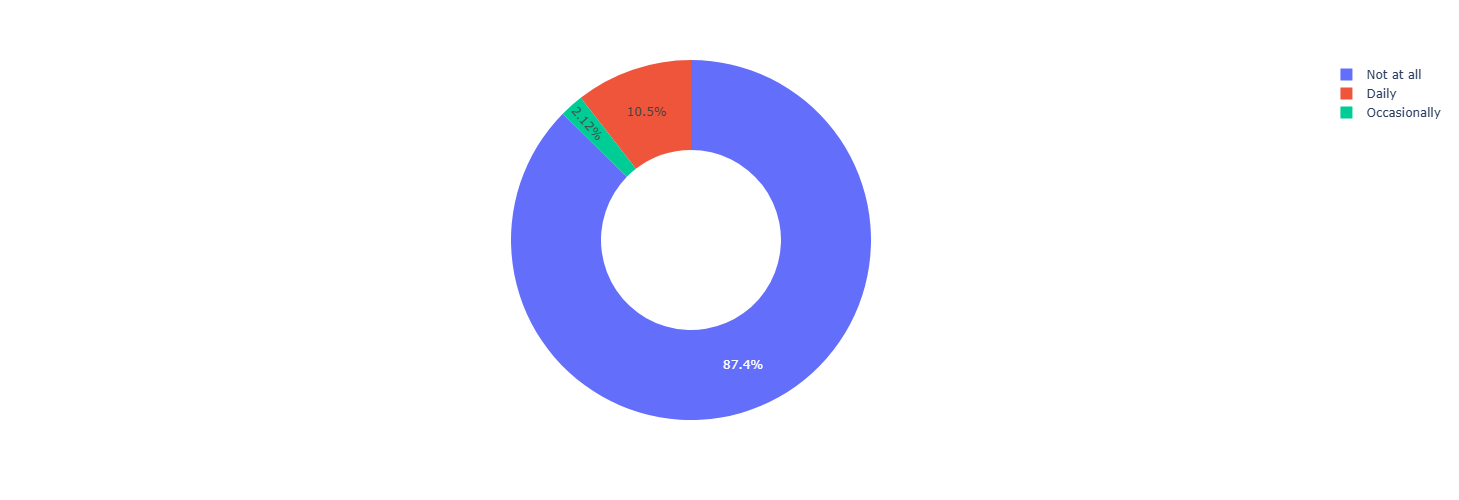

,smkfrequency,count
0,Daily,9532
1,Not at all,79361
2,Occasionally,1928


In [103]:
analysis1a = convdata.groupby('smkfrequency').size().reset_index().rename(columns={"index": "value", 0: "count"})
analysis1a= analysis1a[analysis1a['smkfrequency'].isin(values1)]
fig = px.pie(analysis1a, values='count', names='smkfrequency',hole=.5,width=500,height=500) #color_discrete_sequence=["green", "red","yellow"]
fig.show()
analysis1a

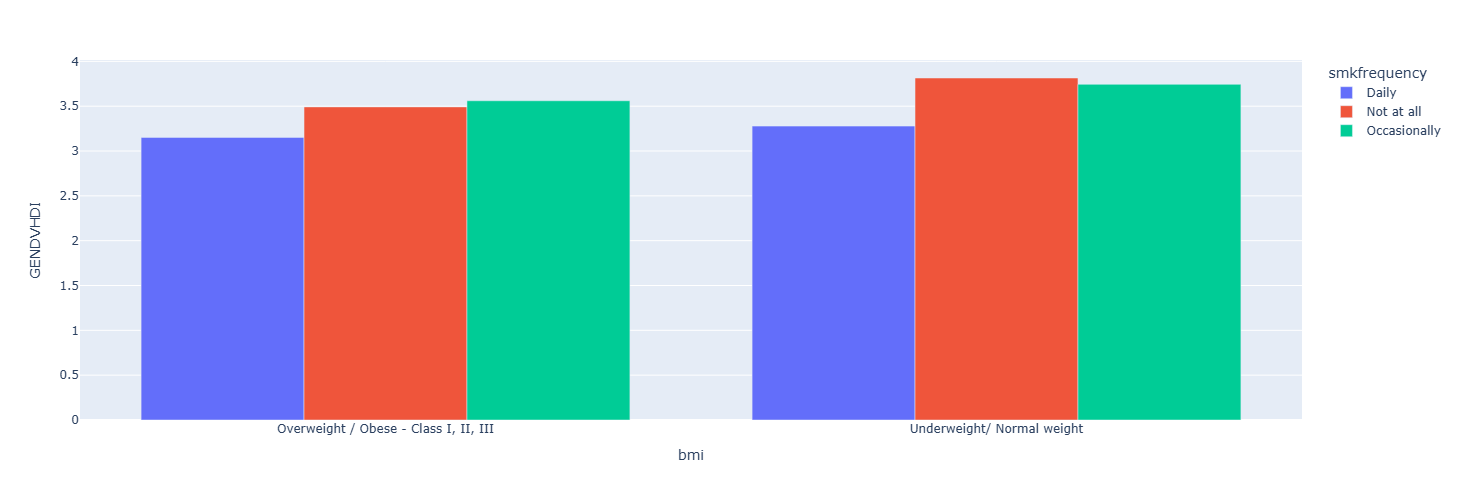

In [209]:
fig = px.bar(analysis1, x="bmi", y="GENDVHDI",color='smkfrequency',barmode='group',height=500,width=800)
fig.show()

In [ ]:
#analysis1.to_csv('C:/Users/Venkateshwaran/OneDrive/Desktop/Data601_Assignment/question1_data.csv', index=False)

In [165]:
analysis2=convdata.groupby(['smkfrequency','agegroup'])['GENDVHDI'].mean().reset_index()
analysis2


,smkfrequency,agegroup,GENDVHDI
0,Daily,18 to 34 years,3.460057
1,Daily,35 to 49 years,3.367039
2,Daily,50 to 64 years,3.094328
3,Daily,65 and older,3.096902
4,Not at all,18 to 34 years,3.931262
5,Not at all,35 to 49 years,3.840022
6,Not at all,50 to 64 years,3.627040
7,Not at all,65 and older,3.455410
8,Occasionally,18 to 34 years,3.732558
9,Occasionally,35 to 49 years,3.760081


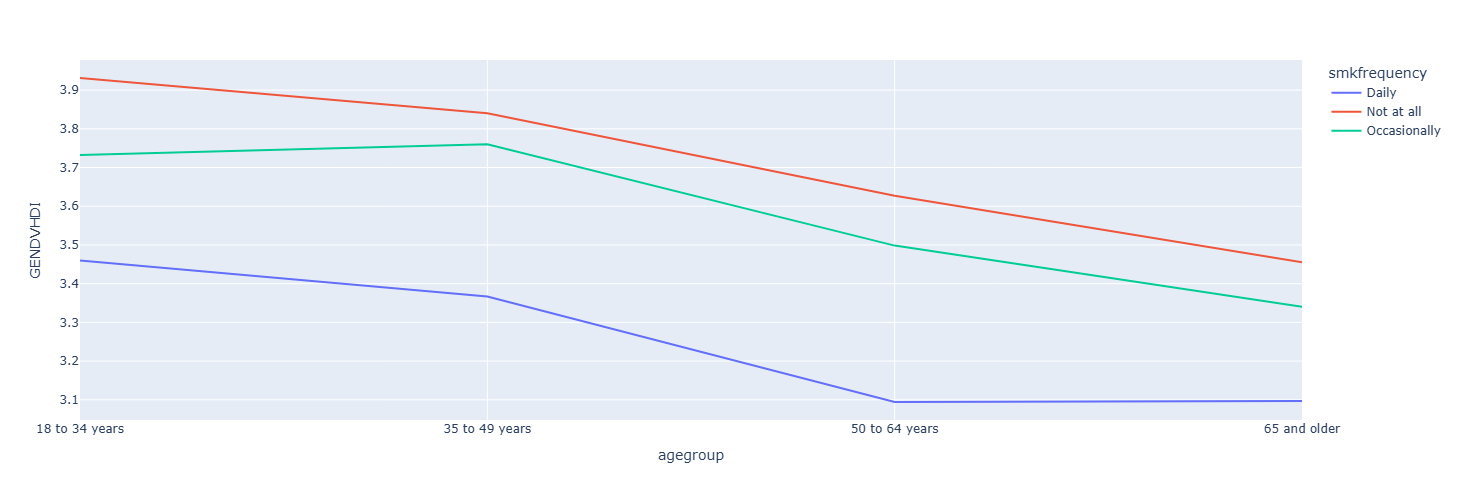

In [199]:
fig = px.line(analysis2, x="agegroup", y="GENDVHDI", color="smkfrequency",hover_data=['agegroup'],height=500,width=800)
fig.show()

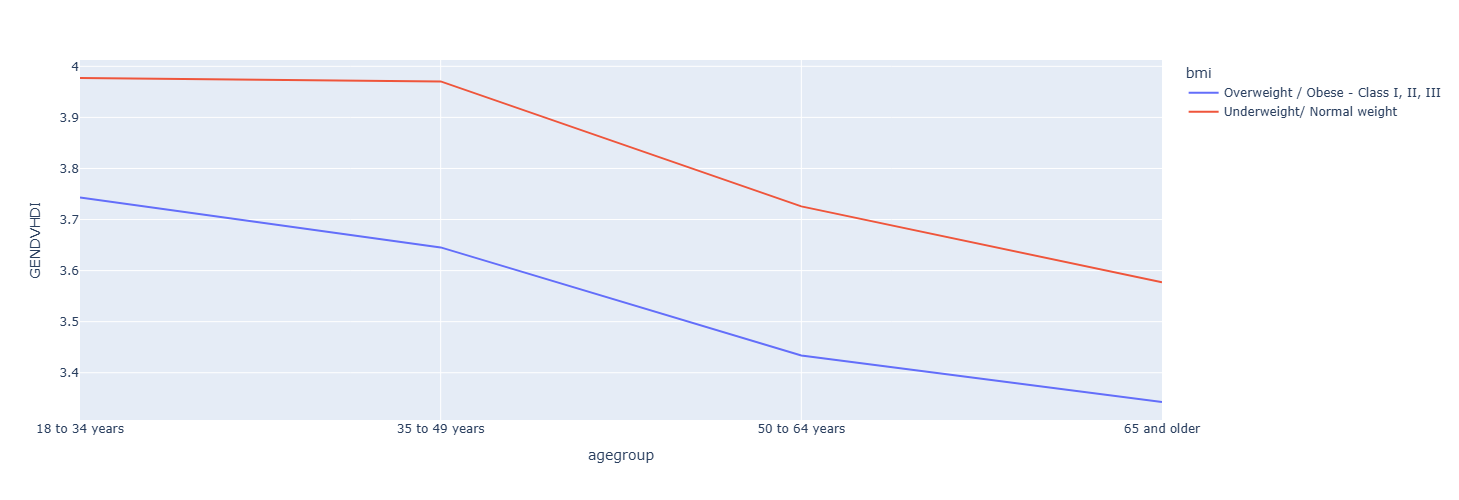

In [213]:
analysis3=convdata.groupby(['bmi','agegroup'])['GENDVHDI'].mean().reset_index()
analysis3

fig = px.line(analysis3, x="agegroup", y="GENDVHDI", color="bmi",hover_data=['agegroup'],height=500,width=800)
fig.show()

In [179]:
analysis4=convdata.groupby(['smkfrequency','bmi'])['GENDVHDI'].mean().reset_index()
analysis4

,smkfrequency,bmi,GENDVHDI
0,Daily,"Overweight / Obese - Class I, II, III",3.151904
1,Daily,Underweight/ Normal weight,3.277804
2,Not at all,"Overweight / Obese - Class I, II, III",3.492109
3,Not at all,Underweight/ Normal weight,3.814459
4,Occasionally,"Overweight / Obese - Class I, II, III",3.560591
5,Occasionally,Underweight/ Normal weight,3.743702


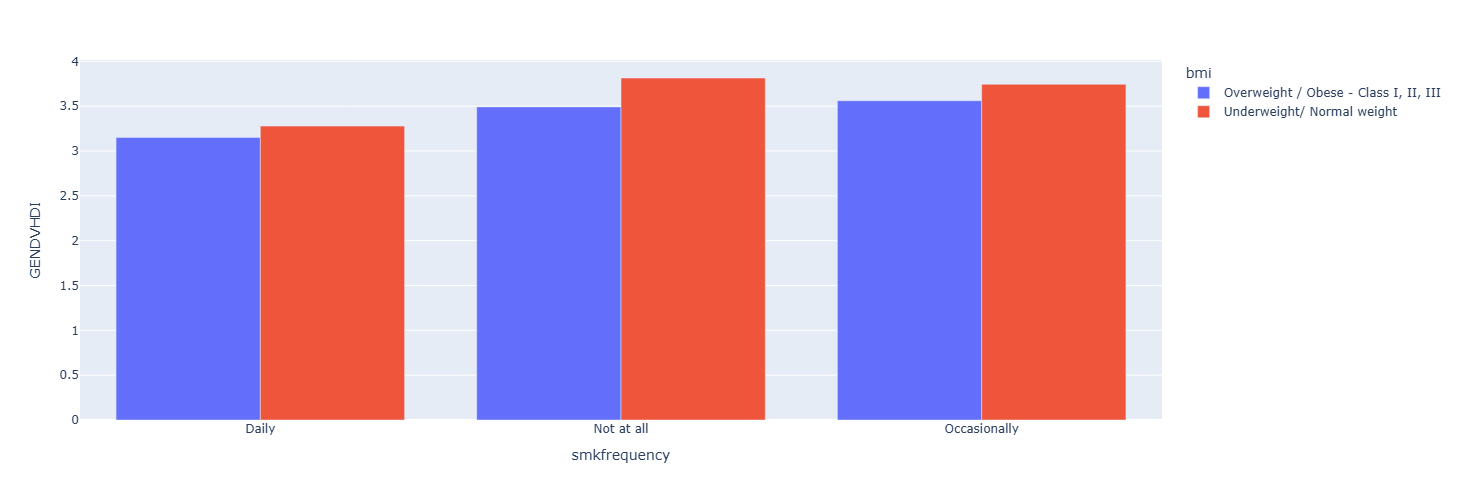

In [207]:
fig = px.bar(analysis4, x="smkfrequency", y="GENDVHDI", color="bmi",hover_data=['bmi'],barmode='group',height=500,width=800)
fig.show()

In [217]:
analysis5=convdata.groupby(['smkfrequency','geo'])['GENDVHDI'].mean().reset_index()
analysis5

,smkfrequency,geo,GENDVHDI
0,Daily,ALBERTA,3.194763
1,Daily,BRITISH COLUMBIA,3.142349
2,Daily,MANITOBA,3.166324
3,Daily,NEW BRUNSWICK,3.015915
4,Daily,NEWFOUNDLAND AND LABRADOR,3.173004
5,Daily,NOVA SCOTIA,3.022177
6,Daily,ONTARIO,3.192820
7,Daily,PRINCE EDWARD ISLAND,3.108475
8,Daily,QUEBEC,3.360448
9,Daily,SASKATCHEWAN,3.212569


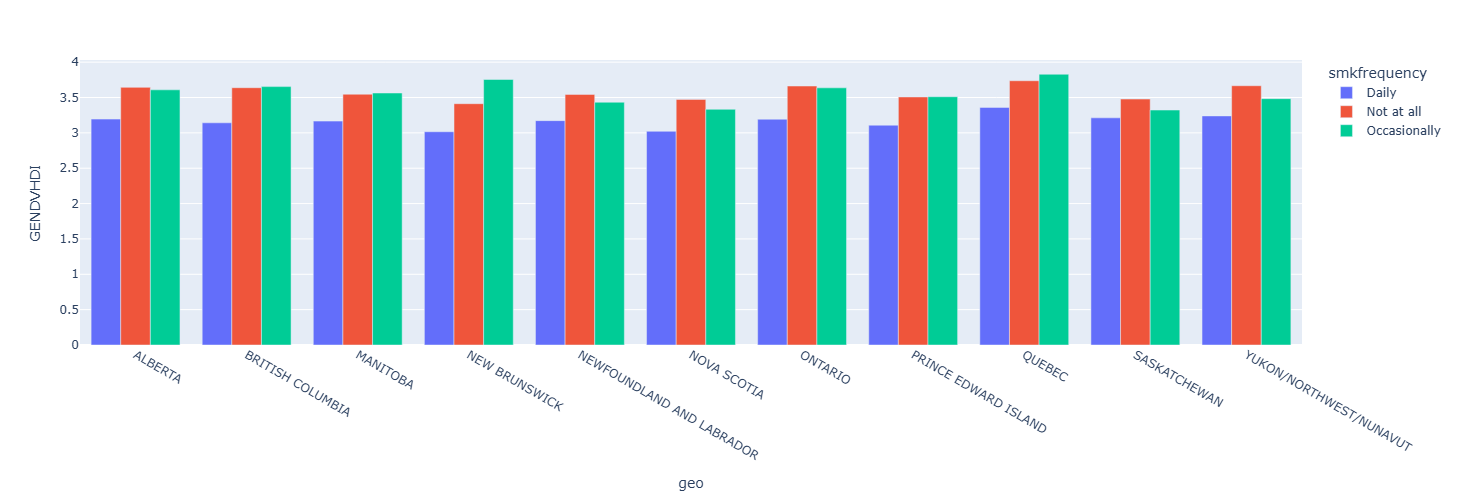

In [223]:
fig = px.bar(analysis5, x="geo", y="GENDVHDI",color='smkfrequency',barmode='group',height=500,width=2000)
fig.show()